# Classification for Predicting Age

In [1]:
import pandas as pd
import numpy as np
import missingno as msno

### Reading the data in CSV and checking for Missing values

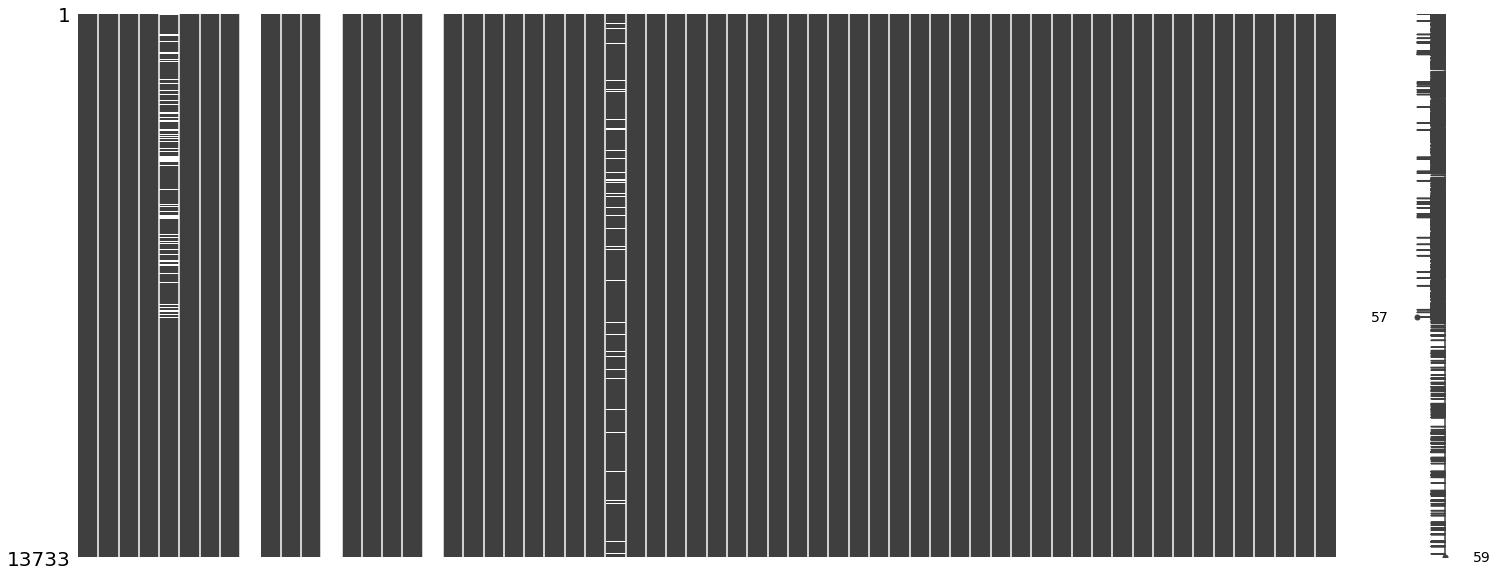

In [2]:
raw_data=pd.read_csv('Customer_demographics_sales.csv')
msno.matrix(raw_data)

In [3]:
pd.set_option('display.max_rows', None)

In [4]:
raw_data["AGE"].value_counts()

19        233
40        227
65        224
58        219
38        218
66        217
48        217
50        208
28        208
47        208
72        207
51        207
57        206
24        202
27        202
33        201
36        199
35        198
75        197
76        196
25        194
60        192
52        191
18        191
64        188
46        187
20        187
67        186
31        184
49        184
68        182
32        181
61        180
70        179
44        178
78        178
63        177
30        176
80        174
22        174
74        173
37        173
53        171
34        170
29        169
21        166
55        165
62        161
39        159
77        159
69        158
71        157
42        157
79        155
23        155
54        154
43        154
26        153
45        145
59        139
73        138
56        136
41        123
age-NA    109
age-18     46
age-57     35
age-69     35
age-20     34
age-24     33
age-40     33
age-72     32
age-47

In [5]:
#raw_data["AGE"]

### Installing Pyspark if not running on Spark Shell

In [6]:
!pip install pyspark

In [7]:
import pyspark
from pyspark import SparkContext,SparkConf
from pyspark.sql import SQLContext,SparkSession,HiveContext

In [8]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
spark = SparkSession.builder.getOrCreate()

In [9]:
#import spark
#spark = SparkSession.builder.appName('CustomerAge').getOrCreate()

In [10]:
df=spark.read.csv('Customer_demographics_sales.csv',inferSchema=True,header=True)

In [11]:
df.show()

+--------------------+----------+--------------------+----------+-----+------------+-----------+-----------------+--------+--------------------+--------------+---------------+--------+-----------+-----------+----------------+-----------------+--------------+-------+--------+-------------------+--------------------+---------------+--------------+-------------------+---------------+---+-----------+-----------+-------------------+---------------+-----------+------------+---------+-------+-------+------+---------+-----+------------+----------------+----+----+---------+------------+-----+-------+-------+---------+------------+----------+------+-----------------+----------+------------+-------------+----+---------------+-------------+------------+--------+------+
|            CUSTNAME|GenderCode|            ADDRESS1|      CITY|STATE|COUNTRY_CODE|POSTAL_CODE|POSTAL_CODE_PLUS4|ADDRESS2|       EMAIL_ADDRESS|  PHONE_NUMBER|CREDITCARD_TYPE|LOCALITY|SALESMAN_ID|NATIONALITY|     NATIONAL_ID|CREDITC

In [12]:
df.columns

['CUSTNAME',
 'GenderCode',
 'ADDRESS1',
 'CITY',
 'STATE',
 'COUNTRY_CODE',
 'POSTAL_CODE',
 'POSTAL_CODE_PLUS4',
 'ADDRESS2',
 'EMAIL_ADDRESS',
 'PHONE_NUMBER',
 'CREDITCARD_TYPE',
 'LOCALITY',
 'SALESMAN_ID',
 'NATIONALITY',
 'NATIONAL_ID',
 'CREDITCARD_NUMBER',
 'DRIVER_LICENSE',
 'CUST_ID',
 'ORDER_ID',
 'ORDER_DATE',
 'ORDER_TIME',
 'FREIGHT_CHARGES',
 'ORDER_SALESMAN',
 'ORDER_POSTED_DATE',
 'ORDER_SHIP_DATE',
 'AGE',
 'ORDER_VALUE',
 'T_TYPE',
 'PURCHASE_TOUCHPOINT',
 'PURCHASE_STATUS',
 'ORDER_TYPE',
 'GENERATION',
 'Baby Food',
 'Diapers',
 'Formula',
 'Lotion',
 'Baby wash',
 'Wipes',
 'Fresh Fruits',
 'Fresh Vegetables',
 'Beer',
 'Wine',
 'Club Soda',
 'Sports Drink',
 'Chips',
 'Popcorn',
 'Oatmeal',
 'Medicines',
 'Canned Foods',
 'Cigarettes',
 'Cheese',
 'Cleaning Products',
 'Condiments',
 'Frozen Foods',
 'Kitchen Items',
 'Meat',
 'Office Supplies',
 'Personal Care',
 'Pet Supplies',
 'Sea Food',
 'Spices']

In [13]:
df.printSchema()

root
 |-- CUSTNAME: string (nullable = true)
 |-- GenderCode: string (nullable = true)
 |-- ADDRESS1: string (nullable = true)
 |-- CITY: string (nullable = true)
 |-- STATE: string (nullable = true)
 |-- COUNTRY_CODE: string (nullable = true)
 |-- POSTAL_CODE: string (nullable = true)
 |-- POSTAL_CODE_PLUS4: integer (nullable = true)
 |-- ADDRESS2: string (nullable = true)
 |-- EMAIL_ADDRESS: string (nullable = true)
 |-- PHONE_NUMBER: string (nullable = true)
 |-- CREDITCARD_TYPE: string (nullable = true)
 |-- LOCALITY: string (nullable = true)
 |-- SALESMAN_ID: string (nullable = true)
 |-- NATIONALITY: string (nullable = true)
 |-- NATIONAL_ID: string (nullable = true)
 |-- CREDITCARD_NUMBER: long (nullable = true)
 |-- DRIVER_LICENSE: string (nullable = true)
 |-- CUST_ID: integer (nullable = true)
 |-- ORDER_ID: integer (nullable = true)
 |-- ORDER_DATE: timestamp (nullable = true)
 |-- ORDER_TIME: timestamp (nullable = true)
 |-- FREIGHT_CHARGES: double (nullable = true)
 |-- OR

Printing All the Null values present in the dataframe which is greater than 0

In [14]:
from pyspark.sql.functions import isnan,when,count,col,isnull
for col in df.columns:
    k=df.select([count(when(isnull(col),True))]).first()[0]
    if int(k)>0:
        print(col,":",k)

STATE : 1547
ADDRESS2 : 13733
LOCALITY : 13733
DRIVER_LICENSE : 13733


From Above we could easily see there is no point on keeping columns Address2,Locality,Driver_Licence

In [15]:
columns_to_drop=["ADDRESS2","LOCALITY","DRIVER_LICENSE"]
df2=df.drop(*columns_to_drop)

In [16]:
#df2.columns

In [43]:
import pixiedust
pixiedust.optOut()

Pixiedust database opened successfully
Table VERSION_TRACKER created successfully
Table METRICS_TRACKER created successfully

Share anonymous install statistics? (opt-out instructions)

PixieDust will record metadata on its environment the next time the package is installed or updated. The data is anonymized and aggregated to help plan for future releases, and records only the following values:

{
   "data_sent": currentDate,
   "runtime": "python",
   "application_version": currentPixiedustVersion,
   "space_id": nonIdentifyingUniqueId,
   "config": {
       "repository_id": "https://github.com/ibm-watson-data-lab/pixiedust",
       "target_runtimes": ["Data Science Experience"],
       "event_id": "web",
       "event_organizer": "dev-journeys"
   }
}
You can opt out by calling pixiedust.optOut() in a new cell.


Pixiedust runtime updated. Please restart kernel
Table SPARK_PACKAGES created successfully
Table USER_PREFERENCES created successfully
Table service_connections created successfully
Pixiedust will not collect anonymous install statistics.


In [ ]:
display(df2)

CUSTNAME,GenderCode,ADDRESS1,CITY,STATE,COUNTRY_CODE,POSTAL_CODE,POSTAL_CODE_PLUS4,EMAIL_ADDRESS,PHONE_NUMBER,CREDITCARD_TYPE,SALESMAN_ID,NATIONALITY,NATIONAL_ID,CREDITCARD_NUMBER,CUST_ID,ORDER_ID,ORDER_DATE,ORDER_TIME,FREIGHT_CHARGES,ORDER_SALESMAN,ORDER_POSTED_DATE,ORDER_SHIP_DATE,AGE,ORDER_VALUE,T_TYPE,PURCHASE_TOUCHPOINT,PURCHASE_STATUS,ORDER_TYPE,GENERATION,Baby Food,Diapers,Formula,Lotion,Baby wash,Wipes,Fresh Fruits,Fresh Vegetables,Beer,Wine,Club Soda,Sports Drink,Chips,Popcorn,Oatmeal,Medicines,Canned Foods,Cigarettes,Cheese,Cleaning Products,Condiments,Frozen Foods,Kitchen Items,Meat,Office Supplies,Personal Care,Pet Supplies,Sea Food,Spices
Elizabeth Martinez,Mrs.,947 Rainbow Road,Baltimore,MD,US,21202,0,Elizabeth.B.Martinez@mailinator.com,314-268-8613,Diners Club,NW118,IT,UAAUXX18L25A259N,36774398776896,10231,1479,2016-03-16 17:47:25,2016-03-16 17:47:25.375000,13.7,NE109,2016-03-16 17:47:25,05/08/2016,73,181.03,Complete,Desktop,Frequent,HighValue,Baby_Boomers,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
Janice Carrico,Mrs.,861 Hilltop Haven Drive,Casperia,RI,IT,2041,0,Janice.S.Carrico@pookmail.com,0397 1184273,JCB,NE307,U.S.,22868178,3528869364289590,10611,8410,2016-04-10 00:00:00,2016-04-10 18:36:44.886000,10.15,NW310,2016-04-29 00:00:00,10/05/2016,19,39.51,Complete,Phone,FirstTime,LowValue,Gen_Z,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Lois Gosney,Mrs.,3667 Whitetail Lane,Castelli Calepio,BG,IT,24060,0,Lois.F.Gosney@mailinator.com,0329 3627454,VISA,SC394,IT,EEIJST59L12G583I,4761131717263226,10627,5809,2016-04-07 00:00:00,2016-04-07 08:47:52.556000,23.12,WE157,2016-04-22 00:00:00,25/04/2016,56,24.37,Cancelled,Phone,Occasional,LowValue,Baby_Boomers,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Michael Alejandre,Mr.,1323 Oxford Court,Cincinnati,OH,US,45202,0,Michael.M.Alejandre@pookmail.com,806-945-9509,VISA,SW412,ES,8248375T,4430924369158491,10755,2126,2016-01-06 00:00:00,2016-01-06 18:23:54.564000,1.49,NW118,2016-01-26 00:00:00,07/02/2016,24,49.57,Complete,Phone,Frequent,LowValue,Gen_Y,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
Levi Stevenson,Mr.,3718 Ingram Road,Cossano Canavese,TO,IT,10010,0,Levi.H.Stevenson@pookmail.com,0326 1694211,Discover,WE154,IT,BRXBCQ25T25C118V,6011735835235826,10847,5846,2016-03-16 17:47:25,2016-03-16 17:47:25.375000,22.95,WE289,2016-03-16 17:47:25,05/08/2016,24,58.33,In-Progress,Phone,FirstTime,MediumValue,Gen_Y,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Raphael Meredith,Mr.,836 Fidler Drive,Dallas,TX,US,75240,0,Raphael.L.Meredith@dodgeit.com,218-278-4654,JCB,NW376,IT,VBAMCA34M30B217I,3528489682973294,10891,5521,2016-04-29 00:00:00,2016-04-29 20:59:06.250000,1.49,WE349,2016-06-15 00:00:00,27/06/2016,26,213.28,Complete,Desktop,Frequent,HighValue,Gen_Y,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0
Brandon Boggs,Mr.,1663 Abner Road,Dyraaba Central,NSW,AU,2470,0,Brandon.K.Boggs@mailinator.com,(07) 3894 0426,Discover,SE403,U.S.,579410001,6011825099254736,10983,6285,2016-11-25 00:00:00,2016-11-25 16:23:44.806000,22.77,NW244,2016-12-07 00:00:00,15/12/2016,age-63,133.89,In-Progress,Desktop,Frequent,MediumValue,Gen_Z,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0
Lydia James,Mrs.,2924 Green Gate Lane,East Lansing,MI,US,48823,0,Lydia.P.James@dodgeit.com,618-274-4180,Diners Club,NE178,CA,95456422,36213662709515,10991,7142,2016-01-22 00:00:00,2016-01-22 22:39:06.250000,3.88,SE337,2016-03-10 00:00:00,27/03/2016,49,8.96,Cancelled,Phone,Occasional,LowValue,Gen_X,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Robin Phillips,Master.,731 Post Avenue,Elmhurst,NY,US,11373,0,Robin.A.Phillips@pookmail.com,910-217-3446,VISA,SW343,IT,TXSOOX03H12G277D,4058012825404450,11039,4901,2016-03-31 00:00:00,2016-03-31 18:57:39.380000,29.88,SW142,2016-04-20 00:00:00,30/04/2016,60,30.4,Cancelled,Phone,Occasional,LowValue,Baby_Boomers,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Robin Phillips,Master.,731 

In [48]:
df_pd=df.toPandas()
import seaborn as sns
import matplotlib.pyplot as plt


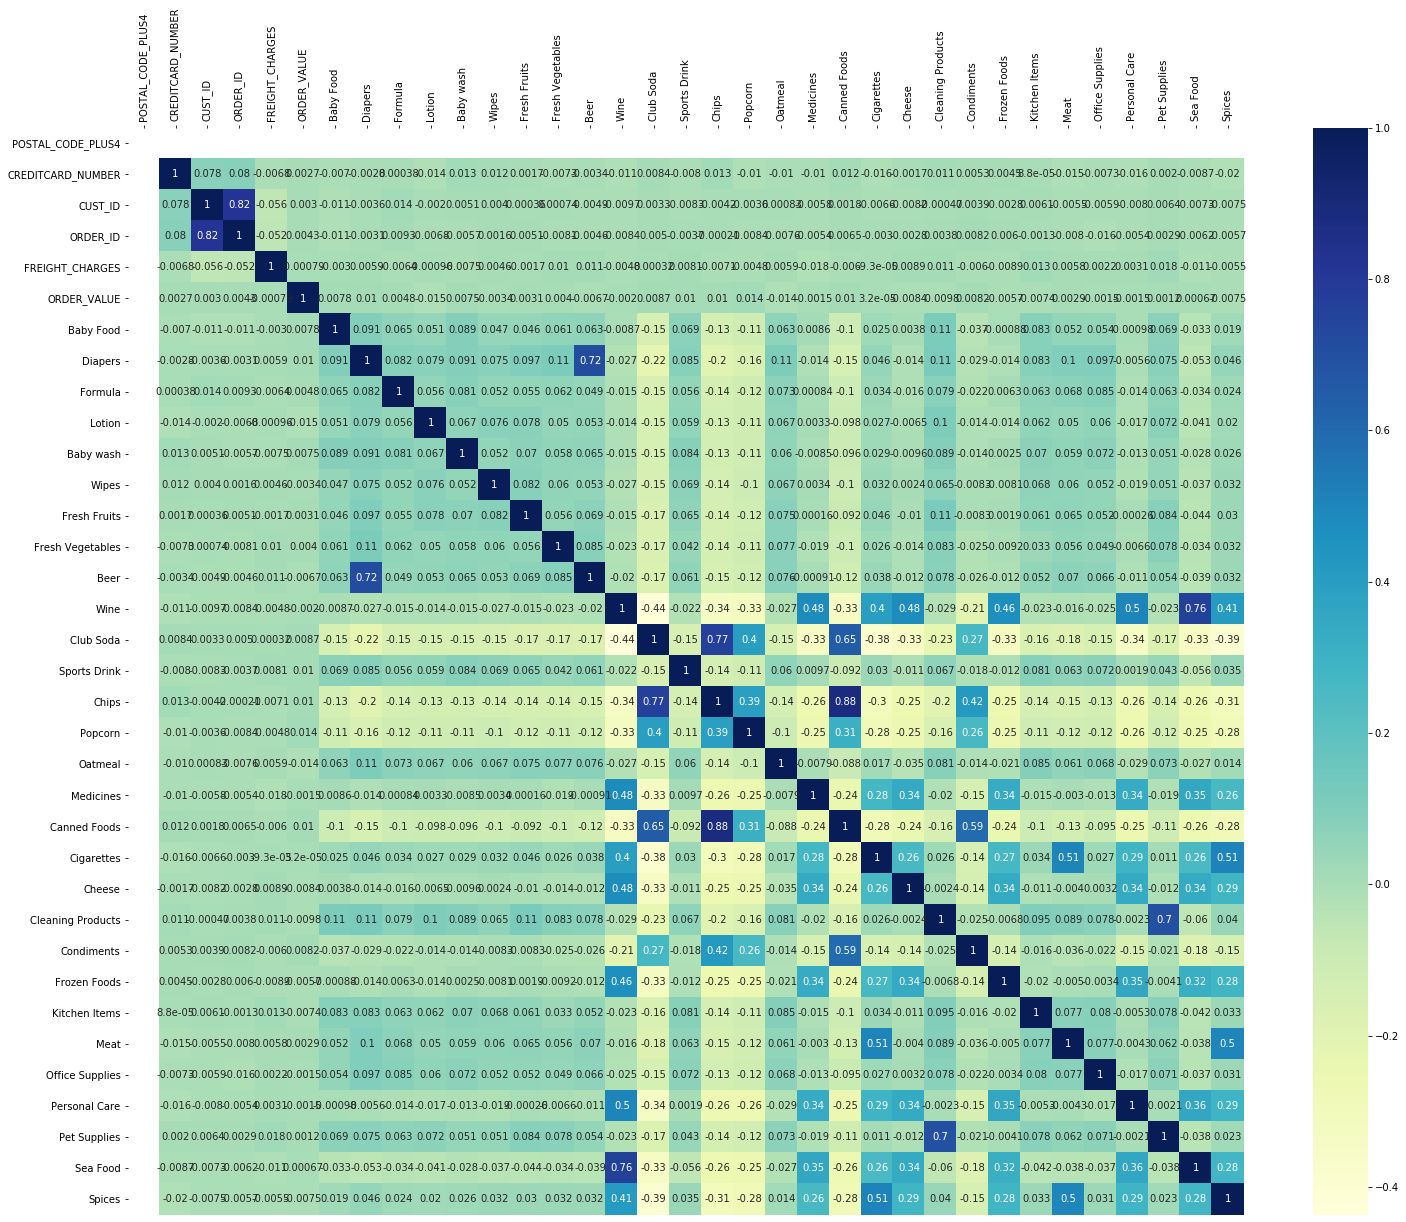

In [49]:
plt.subplots(figsize=(25,20))
hm1 = sns.heatmap(df_pd.corr(), annot=True, cmap='YlGnBu')
hm1.set_xticklabels(hm1.get_xticklabels(), rotation=90)
hm1.xaxis.set_ticks_position('top')

Removing Unnecessary rows which have no connections with the aage of the customer

In [17]:
NonImportant_cols=["CUSTNAME","ADDRESS1","EMAIL_ADDRESS","PHONE_NUMBER","SALESMAN_ID","CREDITCARD_NUMBER",
                   "CUST_ID","ORDER_ID","ORDER_DATE","FREIGHT_CHARGES","ORDER_SALESMAN","ORDER_POSTED_DATE","POSTAL_CODE_PLUS4"]
df3=df2.drop(*NonImportant_cols)

In [18]:
from pyspark.sql.functions import hour
df4=df3.withColumn('hour', hour(df3.ORDER_TIME))

In [19]:
df4=df4.drop("ORDER_TIME")

In [20]:
df4.printSchema()

root
 |-- GenderCode: string (nullable = true)
 |-- CITY: string (nullable = true)
 |-- STATE: string (nullable = true)
 |-- COUNTRY_CODE: string (nullable = true)
 |-- POSTAL_CODE: string (nullable = true)
 |-- CREDITCARD_TYPE: string (nullable = true)
 |-- NATIONALITY: string (nullable = true)
 |-- NATIONAL_ID: string (nullable = true)
 |-- ORDER_SHIP_DATE: string (nullable = true)
 |-- AGE: string (nullable = true)
 |-- ORDER_VALUE: double (nullable = true)
 |-- T_TYPE: string (nullable = true)
 |-- PURCHASE_TOUCHPOINT: string (nullable = true)
 |-- PURCHASE_STATUS: string (nullable = true)
 |-- ORDER_TYPE: string (nullable = true)
 |-- GENERATION: string (nullable = true)
 |-- Baby Food: integer (nullable = true)
 |-- Diapers: integer (nullable = true)
 |-- Formula: integer (nullable = true)
 |-- Lotion: integer (nullable = true)
 |-- Baby wash: integer (nullable = true)
 |-- Wipes: integer (nullable = true)
 |-- Fresh Fruits: integer (nullable = true)
 |-- Fresh Vegetables: intege

Extracting Age from Age column

In [21]:
def extractAge(mystring):
    if len(mystring.strip())>2:
        return mystring.strip().split('-')[1]
    else:
        return mystring
from pyspark.sql.functions import UserDefinedFunction as udf
from pyspark.sql.types import StringType,IntegerType
extract_age_udf = udf(lambda row: extractAge(row), StringType())
df5=df4.withColumn("AGE",extract_age_udf(df4.AGE))


In [41]:
df6.groupBy("AGE").count().show()

+---+-----+
|AGE|count|
+---+-----+
| 31|  194|
| 65|  247|
| 53|  189|
| 78|  195|
| 34|  190|
| 28|  221|
| 76|  210|
| 27|  220|
| 26|  178|
| 44|  201|
| 22|  192|
| 47|  237|
| 52|  215|
| 40|  260|
| 20|  221|
| 57|  241|
| 54|  161|
| 48|  235|
| 19|  255|
| 64|  210|
+---+-----+
only showing top 20 rows



In [23]:
df6=df5.filter(df5.AGE!="NA")

In [24]:
df6=df6.withColumn("AGE",df6.AGE.cast(IntegerType()))

Now we are grouping Age values in some ranges, 
Age: 11-20 Group 1, 
Age: 21-30 Group 2, 
Age: 31-40 Group 3, 
Age: 41-50 Group 4, 
Age: 51-60 Group 5, 
Age: 61-70 Group 6, 
Age: 71-80 Group 7, 
Age: 81-90 Group 8

In [25]:
def GroupAge(age):
    if age>10 and age<=20:
        return 0
    elif age>20 and age<=30:
        return 1
    elif age>30 and age<=40:
        return 2
    elif age>40 and age<=50:
        return 3
    elif age>50 and age<=60:
        return 4
    elif age>60 and age<=70:
        return 5
    elif age>70 and age<=80:
        return 6
    else:
        return 7
groupAgeUDF=udf(lambda row:GroupAge(row),IntegerType())
df7=df6.withColumn("AGE",groupAgeUDF(df6.AGE))

In [26]:
df7.groupby("AGE").count().show()

+---+-----+
|AGE|count|
+---+-----+
|  1| 1980|
|  6| 1934|
|  3| 1955|
|  5| 2063|
|  4| 1972|
|  2| 2091|
|  0|  713|
+---+-----+



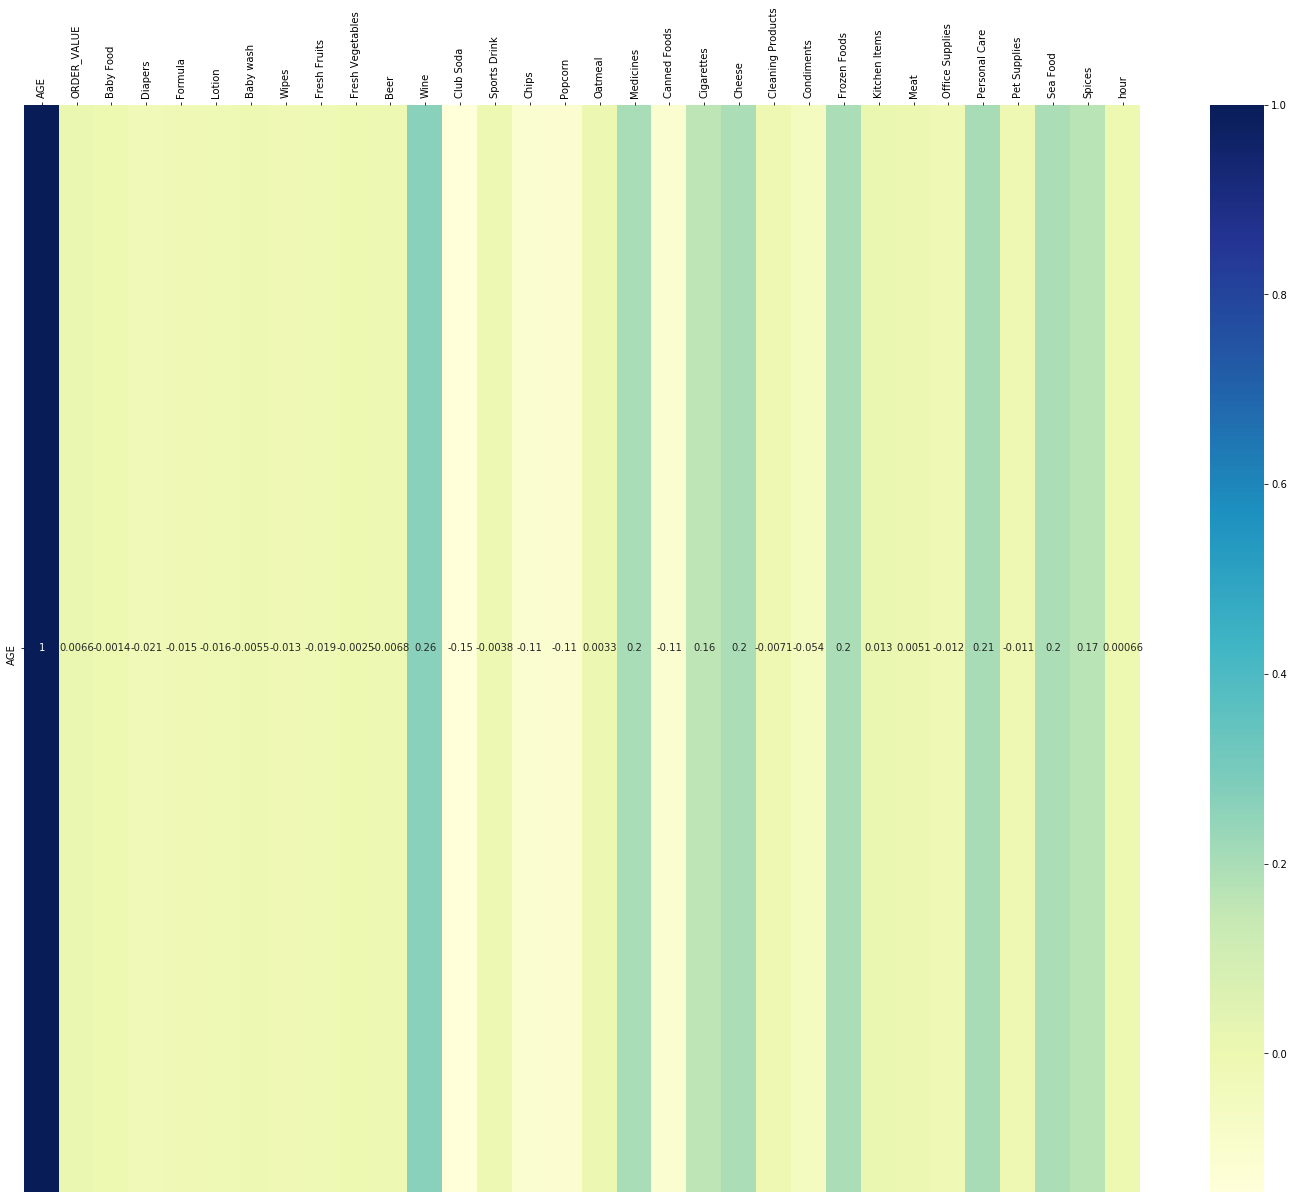

In [54]:
df7_pd=df7.toPandas()
plt.subplots(figsize=(25,20))
hm1 = sns.heatmap(df7_pd.corr().loc[['AGE'],:], annot=True, cmap='YlGnBu')
hm1.set_xticklabels(hm1.get_xticklabels(), rotation=90)
hm1.xaxis.set_ticks_position('top')

In [27]:
df7.columns

['GenderCode',
 'CITY',
 'STATE',
 'COUNTRY_CODE',
 'POSTAL_CODE',
 'CREDITCARD_TYPE',
 'NATIONALITY',
 'NATIONAL_ID',
 'ORDER_SHIP_DATE',
 'AGE',
 'ORDER_VALUE',
 'T_TYPE',
 'PURCHASE_TOUCHPOINT',
 'PURCHASE_STATUS',
 'ORDER_TYPE',
 'GENERATION',
 'Baby Food',
 'Diapers',
 'Formula',
 'Lotion',
 'Baby wash',
 'Wipes',
 'Fresh Fruits',
 'Fresh Vegetables',
 'Beer',
 'Wine',
 'Club Soda',
 'Sports Drink',
 'Chips',
 'Popcorn',
 'Oatmeal',
 'Medicines',
 'Canned Foods',
 'Cigarettes',
 'Cheese',
 'Cleaning Products',
 'Condiments',
 'Frozen Foods',
 'Kitchen Items',
 'Meat',
 'Office Supplies',
 'Personal Care',
 'Pet Supplies',
 'Sea Food',
 'Spices',
 'hour']

In [28]:
categorical_cols=['GenderCode',
 'CITY',
 'STATE',
 'COUNTRY_CODE',
 'POSTAL_CODE',
 'CREDITCARD_TYPE',
 'NATIONALITY',
 'NATIONAL_ID',
 'ORDER_SHIP_DATE',
 'ORDER_VALUE',
 'T_TYPE',
 'PURCHASE_TOUCHPOINT',
 'PURCHASE_STATUS',
 'ORDER_TYPE',
 'GENERATION',
  'hour'
  ]

In [29]:
cols_for_model=['GenderCode_ind',
 'CITY_ind',
 'STATE_ind',
 'COUNTRY_CODE_ind',
 'POSTAL_CODE_ind',
 'CREDITCARD_TYPE_ind',
 'NATIONALITY_ind',
 'NATIONAL_ID_ind',
 'ORDER_SHIP_DATE_ind',
 'ORDER_VALUE_ind',
 'T_TYPE_ind',
 'PURCHASE_TOUCHPOINT_ind',
 'PURCHASE_STATUS_ind',
 'ORDER_TYPE_ind',
 'GENERATION_ind',
 'Baby Food',
 'Diapers',
 'Formula',
 'Lotion',
 'Baby wash',
 'Wipes',
 'Fresh Fruits',
 'Fresh Vegetables',
 'Beer',
 'Wine',
 'Club Soda',
 'Sports Drink',
 'Chips',
 'Popcorn',
 'Oatmeal',
 'Medicines',
 'Canned Foods',
 'Cigarettes',
 'Cheese',
 'Cleaning Products',
 'Condiments',
 'Frozen Foods',
 'Kitchen Items',
 'Meat',
 'Office Supplies',
 'Personal Care',
 'Pet Supplies',
 'Sea Food',
 'Spices',
 'hour_ind'
  ]

## Creating Machine Learning Algorithm

Splitting the data into train and test

In [30]:
splits=df7.randomSplit([0.8,0.2])
df_train=splits[0]
df_test=splits[1]

In [34]:
from pyspark.ml.feature import StringIndexer,Normalizer,OneHotEncoder
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import GBTClassifier,LogisticRegression
from pyspark.ml import Pipeline

In [97]:
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler
categoricalColumns = categorical_cols
stages = []
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]
label_stringIdx = StringIndexer(inputCol = 'AGE', outputCol = 'label')
stages += [label_stringIdx]
numericCols = ['Baby Food','Diapers','Formula','Lotion','Baby wash','Wipes','Fresh Fruits','Fresh Vegetables','Beer',
 'Wine','Club Soda','Sports Drink','Chips','Popcorn','Oatmeal','Medicines','Canned Foods','Cigarettes','Cheese','Cleaning Products',
 'Condiments','Frozen Foods','Kitchen Items','Meat','Office Supplies','Personal Care','Pet Supplies','Sea Food','Spices',]
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [98]:
cols=df7.columns

In [ ]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df7)
df7 = pipelineModel.transform(df7)
selectedCols = ['label', 'features'] + cols
df7 = df7.select(selectedCols)
df7.printSchema()

In [103]:
df8=df7.select(['features','label'])
df8.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(15042,[1,174,205...|  2.0|
|(15042,[1,174,205...|  2.0|
|(15042,[1,174,205...|  2.0|
|(15042,[1,174,205...|  2.0|
|(15042,[1,174,205...|  2.0|
+--------------------+-----+
only showing top 5 rows



In [ ]:
train, test = df8.randomSplit([0.8, 0.2])
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

In [ ]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)